<a href="https://colab.research.google.com/github/DariusXG/Healthcare-Appointment-Analysis/blob/main/Healthcare_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install any additional packages needed (though most are pre-installed in Colab)
!pip install pyodbc

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Generate appointment data
def generate_appointment_data(num_records=1000):
    np.random.seed(42)

    end_date = datetime.now()
    start_date = end_date - timedelta(days=365)
    dates = pd.date_range(start=start_date, end=end_date, freq='D')

    data = {
        'appointment_id': range(1, num_records + 1),
        'patient_id': np.random.randint(1000, 9999, num_records),
        'department': np.random.choice(
            ['Cardiology', 'Primary Care', 'Pediatrics', 'Orthopedics', 'Neurology'],
            num_records,
            p=[0.2, 0.4, 0.15, 0.15, 0.1]
        ),
        'appointment_date': np.random.choice(dates, num_records),
        'insurance_type': np.random.choice(
            ['Private', 'Medicare', 'Medicaid', 'Self-Pay'],
            num_records,
            p=[0.4, 0.3, 0.2, 0.1]
        ),
        'patient_age': np.random.normal(45, 15, num_records).astype(int),
        'patient_gender': np.random.choice(['M', 'F', 'Other'], num_records),
        'distance_to_clinic': np.random.exponential(15, num_records).round(2),
        'previous_no_shows': np.random.poisson(0.5, num_records),
        'wait_time_minutes': np.random.exponential(20, num_records).round(0)
    }

    df = pd.DataFrame(data)
    return df

# Generate and display the dataset
appointments_df = generate_appointment_data(1000)
print("Sample of the generated data:")
appointments_df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.0/336.0 kB 4.8 MB/s eta 0:00:00
Sample of the generated data:


,appointment_id,patient_id,department,appointment_date,insurance_type,patient_age,patient_gender,distance_to_clinic,previous_no_shows,wait_time_minutes
0,1,8270,Orthopedics,2023-12-23 16:39:26.057689,Medicare,-4,F,5.31,0,12.0
1,2,1860,Neurology,2024-06-24 16:39:26.057689,Private,22,M,9.11,1,57.0
2,3,6390,Primary Care,2024-09-02 16:39:26.057689,Medicaid,38,Other,2.68,0,44.0
3,4,6191,Primary Care,2024-01-13 16:39:26.057689,Medicare,60,Other,5.44,1,2.0
4,5,6734,Pediatrics,2024-02-27 16:39:26.057689,Medicare,40,Other,14.56,1,27.0


In [36]:
appointments_df.to_csv('data/appointments.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'data'

In [2]:
# Overall metrics
print("Key Metrics Summary:")
print("-" * 50)
print(f"Total Appointments: {len(appointments_df)}")
print(f"Unique Patients: {appointments_df['patient_id'].nunique()}")
print(f"Average Wait Time: {appointments_df['wait_time_minutes'].mean():.2f} minutes")
print(f"Average Distance to Clinic: {appointments_df['distance_to_clinic'].mean():.2f} miles")
print("\nDepartment Distribution:")
print(appointments_df['department'].value_counts(normalize=True).multiply(100).round(2))

Key Metrics Summary:
--------------------------------------------------
Total Appointments: 1000
Unique Patients: 947
Average Wait Time: 20.04 minutes
Average Distance to Clinic: 15.20 miles

Department Distribution:
department
Primary Care    36.9
Cardiology      20.6
Pediatrics      17.0
Orthopedics     15.6
Neurology        9.9
Name: proportion, dtype: float64


In [3]:
# Create age groups for better analysis
appointments_df['age_group'] = pd.cut(appointments_df['patient_age'],
                                    bins=[0, 18, 30, 50, 70, 100],
                                    labels=['0-18', '19-30', '31-50', '51-70', '70+'])

In [4]:
# Patient Demographics Visualization
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution by Gender')

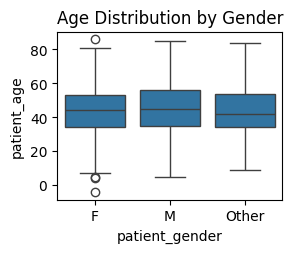

In [5]:
# Age distribution by gender
plt.subplot(2, 2, 1)
sns.boxplot(x='patient_gender', y='patient_age', data=appointments_df)
plt.title('Age Distribution by Gender')


([0, 1, 2, 3],
 [Text(0, 0, 'Medicare'),
  Text(1, 0, 'Private'),
  Text(2, 0, 'Medicaid'),
  Text(3, 0, 'Self-Pay')])

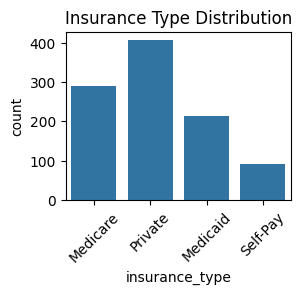

In [6]:
# Insurance type distribution
plt.subplot(2, 2, 2)
sns.countplot(data=appointments_df, x='insurance_type')
plt.title('Insurance Type Distribution')
plt.xticks(rotation=45)

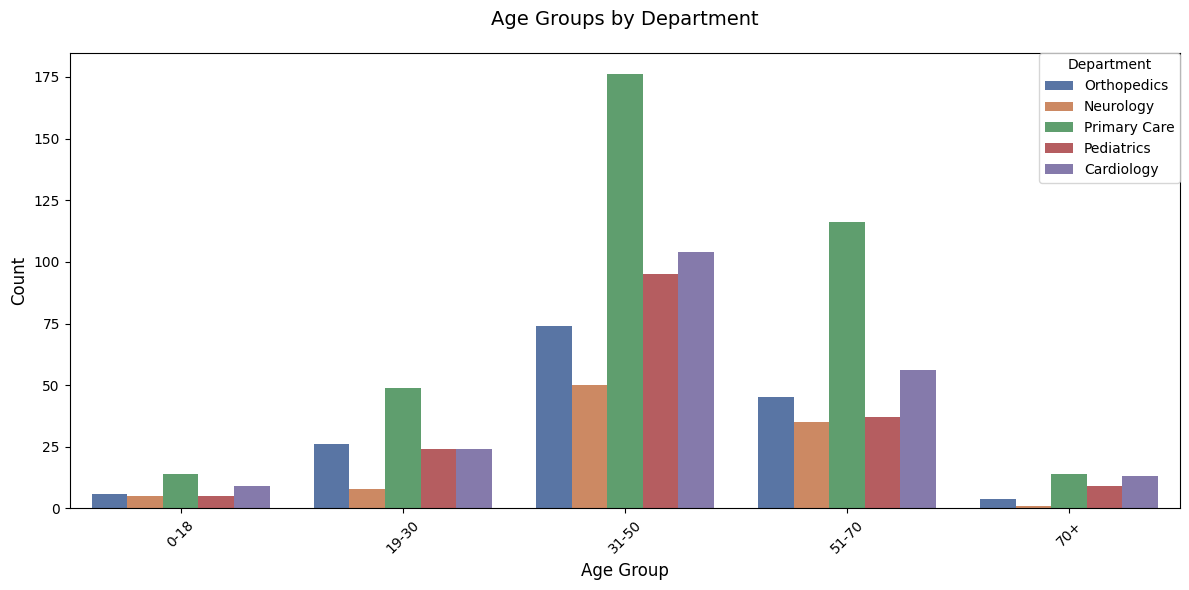

In [32]:
# Create a larger figure with better proportions
plt.figure(figsize=(12, 6))  # Adjust size to match your preference

# Create the countplot with enhanced styling
sns.countplot(data=appointments_df, x='age_group', hue='department', palette='deep')

# Customize the plot
plt.title('Age Groups by Department', pad=20, fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Adjust legend
plt.legend(title='Department', bbox_to_anchor=(1.00, 1), borderaxespad=0)

# Ensure layout fits well
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# Appointment Trends Analysis
appointments_df['appointment_month'] = pd.to_datetime(appointments_df['appointment_date']).dt.month
appointments_df['appointment_dayofweek'] = pd.to_datetime(appointments_df['appointment_date']).dt.day_name()

plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Number of Appointments')

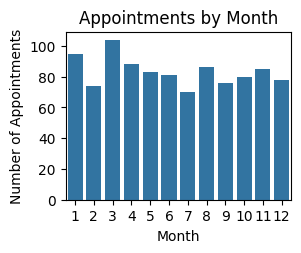

In [11]:
# Appointments by month
plt.subplot(2, 2, 1)
monthly_appointments = appointments_df['appointment_month'].value_counts().sort_index()
sns.barplot(x=monthly_appointments.index, y=monthly_appointments.values)
plt.title('Appointments by Month')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')

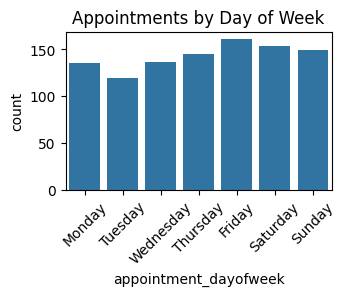

In [12]:
# Appointments by day of week
plt.subplot(2, 2, 2)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=appointments_df, x='appointment_dayofweek',
              order=[d for d in day_order if d in appointments_df['appointment_dayofweek'].unique()])
plt.title('Appointments by Day of Week')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

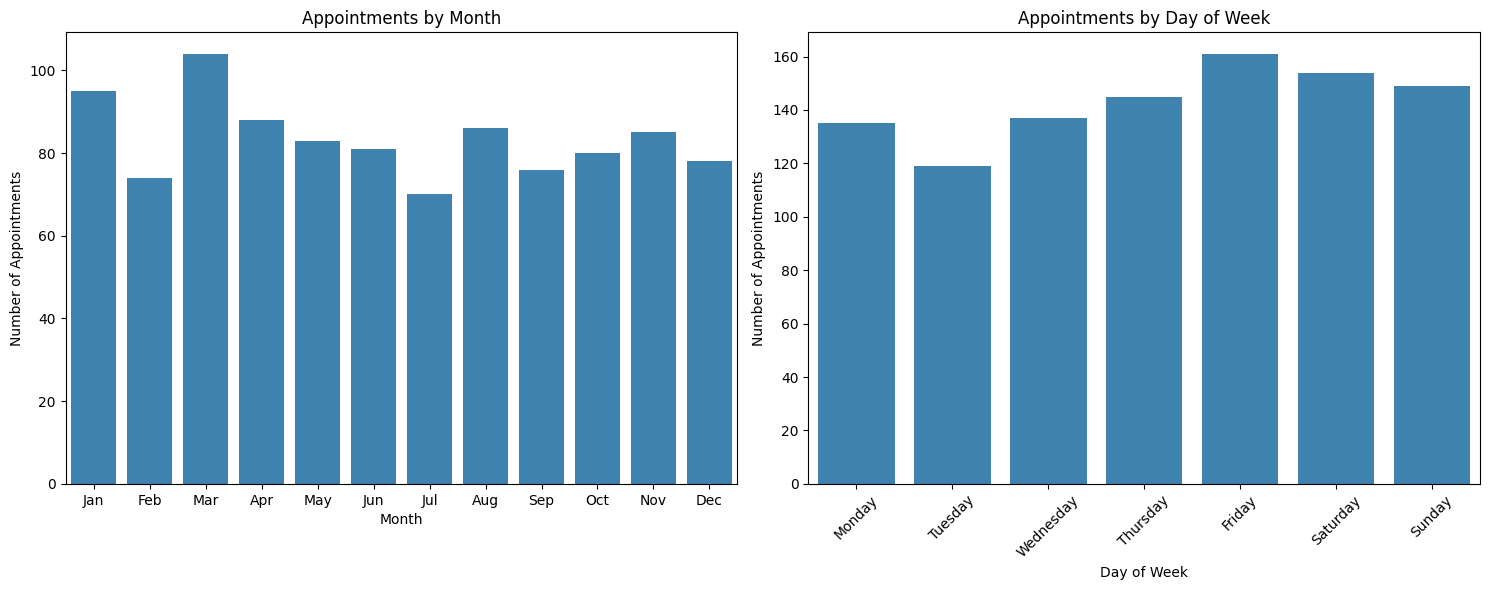

In [35]:
# Create a figure with two subplots side by side
plt.figure(figsize=(15, 6))

# Create month abbreviations mapping
month_abbr = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

# First subplot - Appointments by Month
plt.subplot(1, 2, 1)
monthly_appointments = appointments_df['appointment_month'].value_counts().sort_index()
monthly_appointments.index = monthly_appointments.index.map(month_abbr)  # Convert to abbreviated months
sns.barplot(x=monthly_appointments.index, y=monthly_appointments.values, color='#2E86C1')  # Darker blue
plt.title('Appointments by Month')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')

# Second subplot - Appointments by Day of Week
plt.subplot(1, 2, 2)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=appointments_df, x='appointment_dayofweek',
              order=[d for d in day_order if d in appointments_df['appointment_dayofweek'].unique()],
              color='#2E86C1')  # Same darker blue
plt.title('Appointments by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [13]:
# Wait Time Analysis
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<ipython-input-22-e30a91183f71>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_wait_by_dept.index, y=avg_wait_by_dept.values, palette='coolwarm')


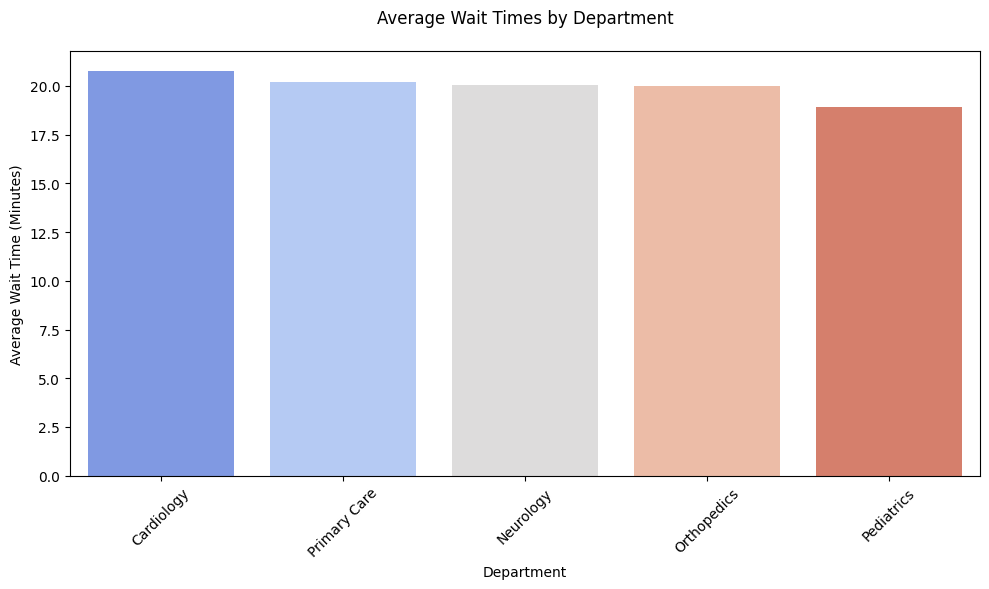

In [22]:
# 1. Bar plot with average wait times by department
plt.figure(figsize=(10, 6))
avg_wait_by_dept = appointments_df.groupby('department')['wait_time_minutes'].mean().sort_values(ascending=False)
sns.barplot(x=avg_wait_by_dept.index, y=avg_wait_by_dept.values, palette='coolwarm')
plt.title('Average Wait Times by Department', pad=20)
plt.xlabel('Department')
plt.ylabel('Average Wait Time (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-23-c22be0148e1b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_wait_by_insurance.index, x=avg_wait_by_insurance.values, palette='viridis')


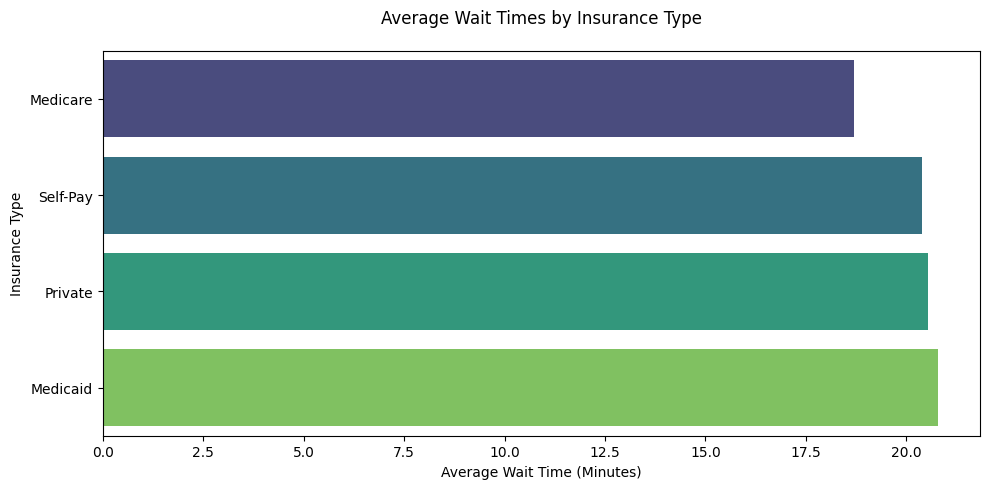

In [23]:
plt.figure(figsize=(10, 5))
avg_wait_by_insurance = appointments_df.groupby('insurance_type')['wait_time_minutes'].mean().sort_values()
sns.barplot(y=avg_wait_by_insurance.index, x=avg_wait_by_insurance.values, palette='viridis')
plt.title('Average Wait Times by Insurance Type', pad=20)
plt.xlabel('Average Wait Time (Minutes)')
plt.ylabel('Insurance Type')
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Cardiology'),
  Text(1, 0, 'Neurology'),
  Text(2, 0, 'Orthopedics'),
  Text(3, 0, 'Pediatrics'),
  Text(4, 0, 'Primary Care')])

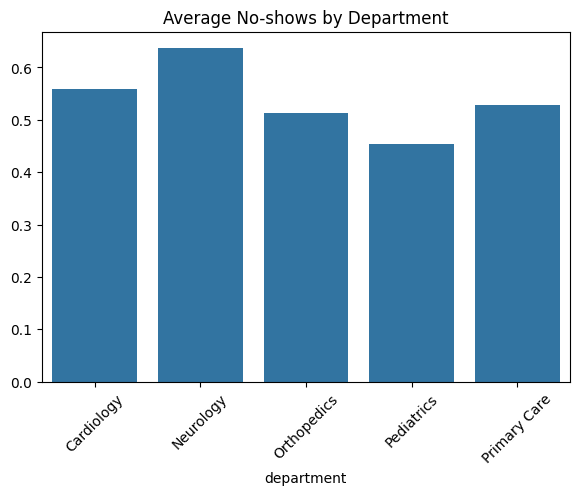

In [17]:
# No-show Analysis
plt.figure(figsize=(15, 10))

# No-shows by department
plt.subplot(2, 2, 1)
dept_no_shows = appointments_df.groupby('department')['previous_no_shows'].mean()
sns.barplot(x=dept_no_shows.index, y=dept_no_shows.values)
plt.title('Average No-shows by Department')
plt.xticks(rotation=45)

<ipython-input-25-73cb20153abd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ins_no_shows.index, y=ins_no_shows.values, palette='viridis')


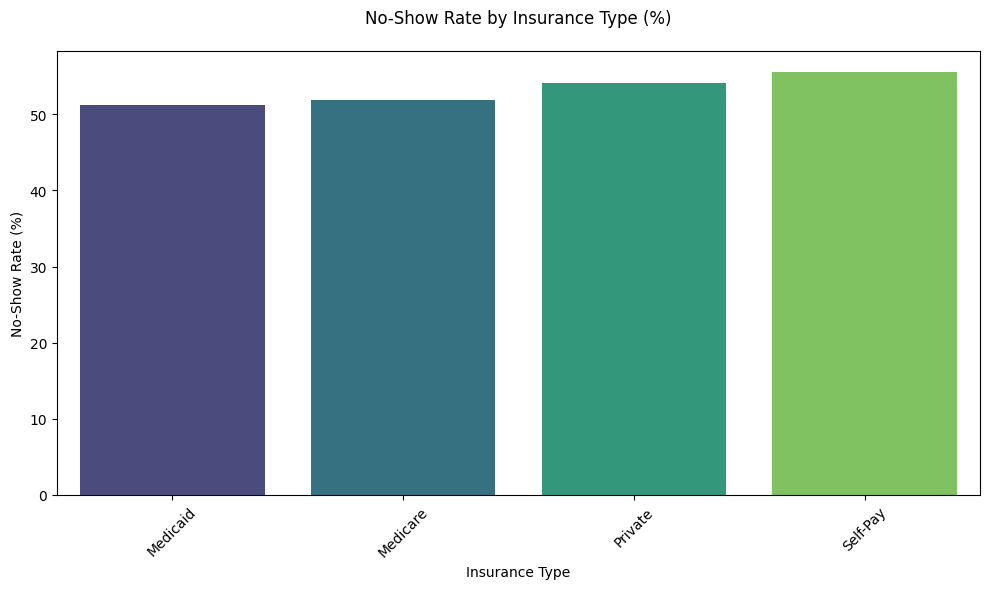

In [25]:
# No-shows by insurance type as percentage
plt.figure(figsize=(10, 6))
ins_no_shows = appointments_df.groupby('insurance_type')['previous_no_shows'].mean() * 100
sns.barplot(x=ins_no_shows.index, y=ins_no_shows.values, palette='viridis')
plt.title('No-Show Rate by Insurance Type (%)', pad=20)
plt.xlabel('Insurance Type')
plt.ylabel('No-Show Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-26-a7842a2717d3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_no_shows = appointments_df.groupby('age_group')['previous_no_shows'].mean() * 100
<ipython-input-26-a7842a2717d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_no_shows.index, y=age_no_shows.values, palette='viridis')


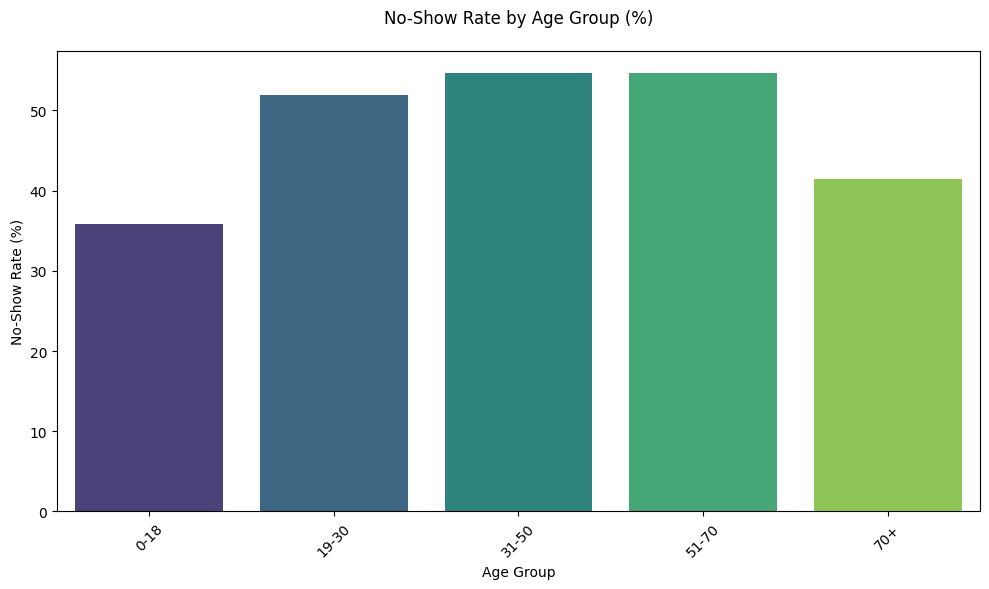

In [26]:
# No-shows by age group as percentage
plt.figure(figsize=(10, 6))
age_no_shows = appointments_df.groupby('age_group')['previous_no_shows'].mean() * 100
sns.barplot(x=age_no_shows.index, y=age_no_shows.values, palette='viridis')
plt.title('No-Show Rate by Age Group (%)', pad=20)
plt.xlabel('Age Group')
plt.ylabel('No-Show Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-27-867597e5024a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ins_no_shows.index, y=ins_no_shows.values, palette='viridis')


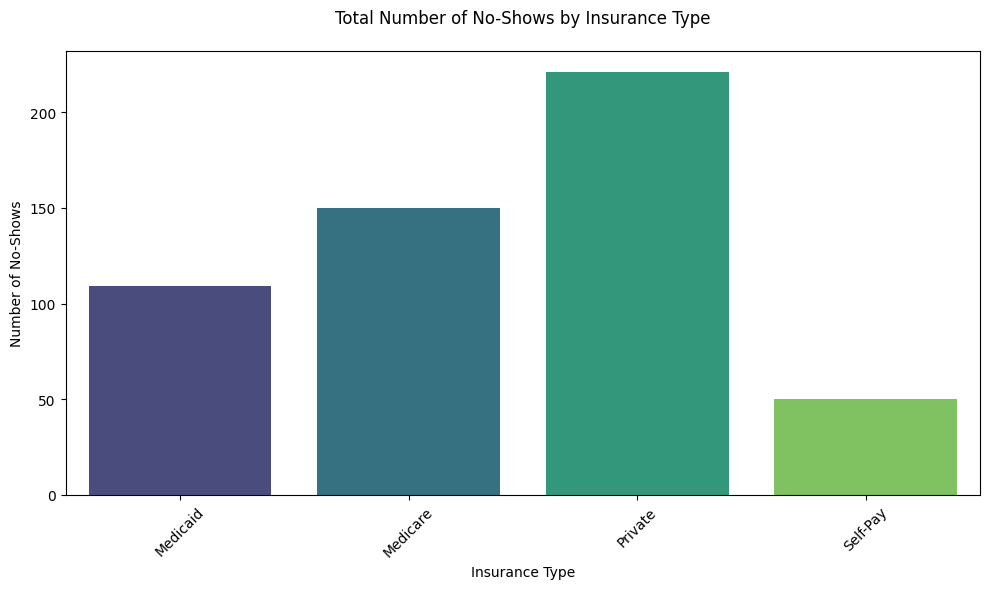

In [27]:
# Total no-shows by insurance type
plt.figure(figsize=(10, 6))
ins_no_shows = appointments_df.groupby('insurance_type')['previous_no_shows'].sum()
sns.barplot(x=ins_no_shows.index, y=ins_no_shows.values, palette='viridis')
plt.title('Total Number of No-Shows by Insurance Type', pad=20)
plt.xlabel('Insurance Type')
plt.ylabel('Number of No-Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-28-511282c520fd>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_no_shows = appointments_df.groupby('age_group')['previous_no_shows'].sum()
<ipython-input-28-511282c520fd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_no_shows.index, y=age_no_shows.values, palette='viridis')


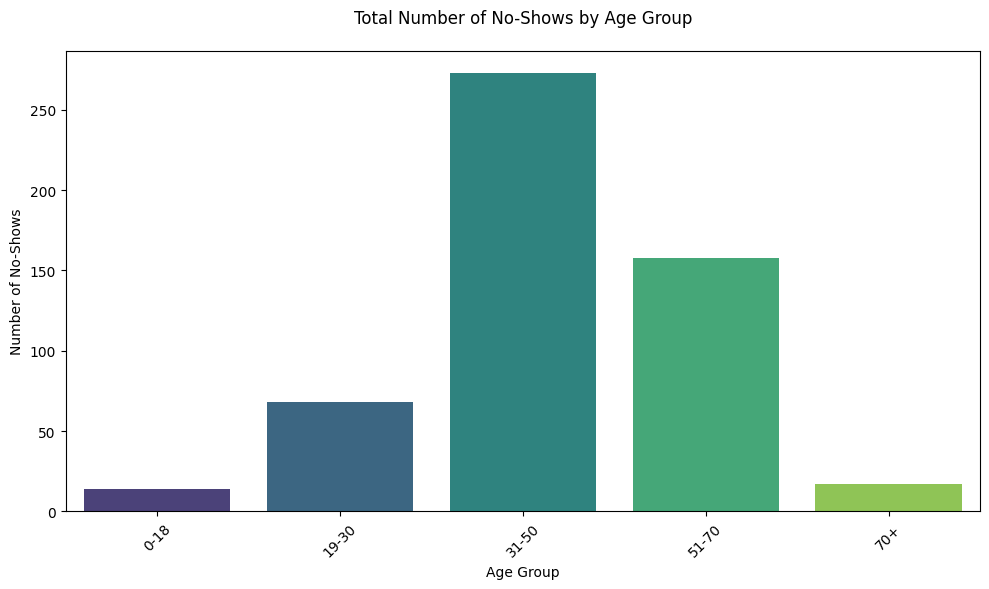

In [28]:
# Total no-shows by age group
plt.figure(figsize=(10, 6))
age_no_shows = appointments_df.groupby('age_group')['previous_no_shows'].sum()
sns.barplot(x=age_no_shows.index, y=age_no_shows.values, palette='viridis')
plt.title('Total Number of No-Shows by Age Group', pad=20)
plt.xlabel('Age Group')
plt.ylabel('Number of No-Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-29-cfed3b61b54d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ins_no_shows_pct.index, y=ins_no_shows_pct.values, ax=ax1, palette='viridis')
<ipython-input-29-cfed3b61b54d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ins_no_shows_total.index, y=ins_no_shows_total.values, ax=ax2, palette='viridis')


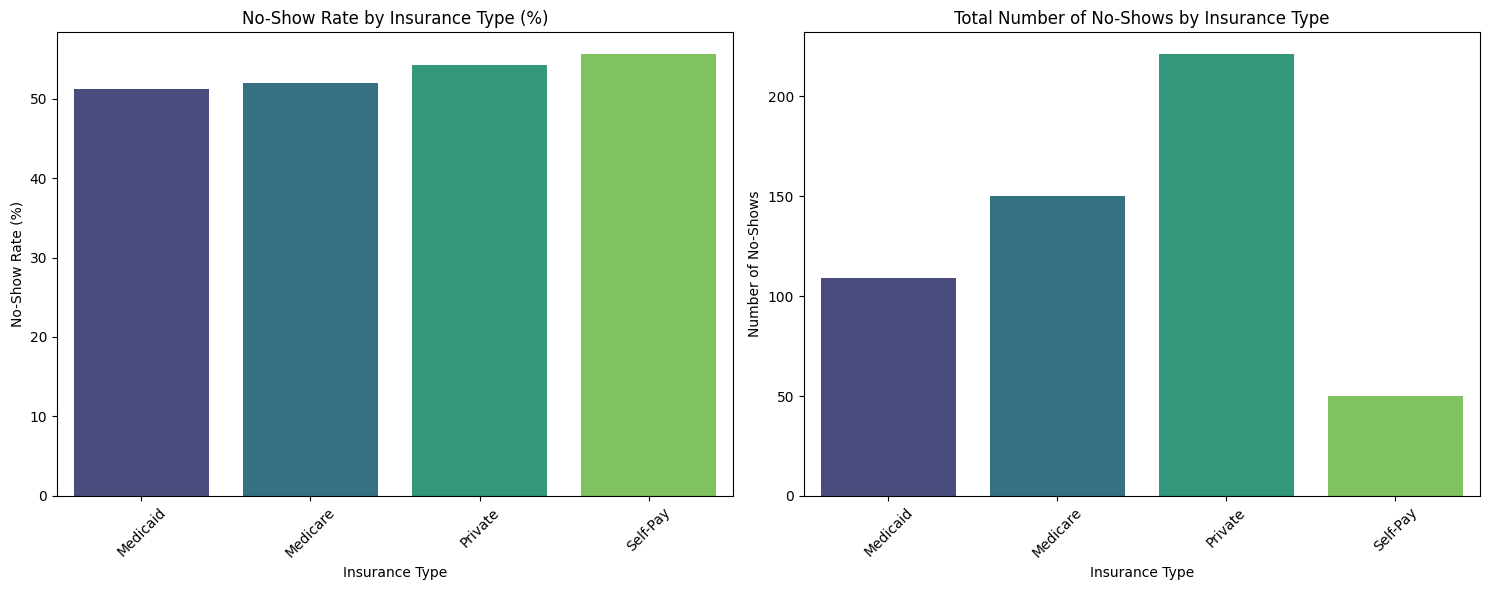

In [29]:
# Create side-by-side comparison of no-show metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left plot - No-show percentages
ins_no_shows_pct = appointments_df.groupby('insurance_type')['previous_no_shows'].mean() * 100
sns.barplot(x=ins_no_shows_pct.index, y=ins_no_shows_pct.values, ax=ax1, palette='viridis')
ax1.set_title('No-Show Rate by Insurance Type (%)')
ax1.set_xlabel('Insurance Type')
ax1.set_ylabel('No-Show Rate (%)')
ax1.tick_params(axis='x', rotation=45)

# Right plot - Total no-shows
ins_no_shows_total = appointments_df.groupby('insurance_type')['previous_no_shows'].sum()
sns.barplot(x=ins_no_shows_total.index, y=ins_no_shows_total.values, ax=ax2, palette='viridis')
ax2.set_title('Total Number of No-Shows by Insurance Type')
ax2.set_xlabel('Insurance Type')
ax2.set_ylabel('Number of No-Shows')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()